## Chapter 6 In-chapter Examples

In [ ]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })
     


### Z-score

In [3]:
X = [ 1,4,-5,2,1 ]

mu = np.mean(X)
sigma = np.std(X,ddof=1)

X_z = (X-mu) / sigma
print(X_z)

[ 0.11899282  1.011439   -1.66589953  0.41647488  0.11899282]


In [4]:
print(f'       Original | z-transformed')
print(f'Mean:      {np.mean(X):.2f} | {np.mean(X_z):.2f}')
print(f'stdev:     {np.std(X,ddof=1):.2f} | {np.std(X_z,ddof=1):.2f}')

       Original | z-transformed
Mean:      0.60 | -0.00
stdev:     3.36 | 1.00


### Fig 6.1: Example distributions of height and weight

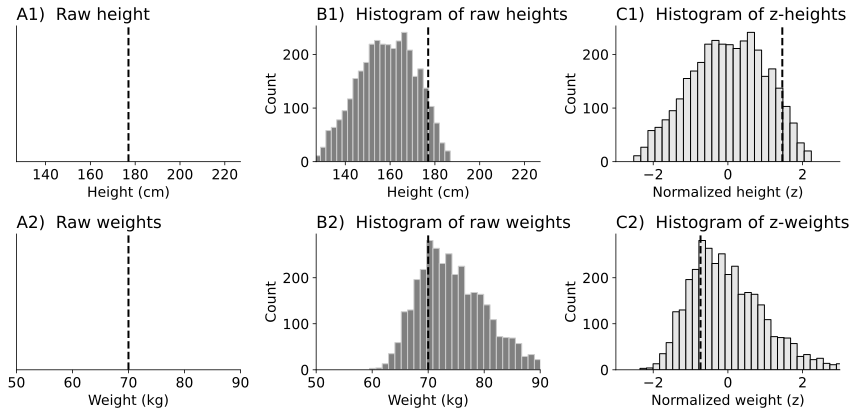

In [5]:
# fake heights and weights, in units of cm and kg
N = 3425
height = np.arctanh(np.random.uniform(-.9,.8,size=N)) * 20 + 160 + np.random.randn(N)*3
weight = np.arctanh(np.random.uniform(-.3,.99,size=N)) * 10 +  70 + np.random.randn(N)*3

# our imaginary individual
ind_height = 177
ind_weight = 70



# z-score the distributions
height_z = (height-np.mean(height)) / np.std(height,ddof=1)
weight_z = (weight-np.mean(weight)) / np.std(weight,ddof=1)

# z-score the individual
ind_height_z = (ind_height-np.mean(height)) / np.std(height,ddof=1)
ind_weight_z = (ind_weight-np.mean(weight)) / np.std(weight,ddof=1)




# figure layout
_,axs = plt.subplots(2,3,figsize=(12,6))

# plot the values
axs[0,0].axvline(ind_height,color='k',linestyle='--',linewidth=2)
axs[0,0].set(xlabel='Height (cm)',yticks=[],xlim=[ind_height-50,ind_height+50])
axs[0,0].set_title(r'A1)  Raw height')

axs[1,0].axvline(ind_weight,color='k',linestyle='--',linewidth=2)
axs[1,0].set(xlabel='Weight (kg)',yticks=[],xlim=[ind_weight-20,ind_weight+20])
axs[1,0].set_title(r'A2)  Raw weights')



# plot the raw distributions with the individual
axs[0,1].hist(height,bins='fd',color=(.5,.5,.5),edgecolor=(.8,.8,.8))
axs[0,1].axvline(ind_height,color='k',linestyle='--',linewidth=2)
axs[0,1].set(xlabel='Height (cm)',ylabel='Count',xlim=[ind_height-50,ind_height+50])
axs[0,1].set_title(r'B1)  Histogram of raw heights')

axs[1,1].hist(weight,bins='fd',color=(.5,.5,.5),edgecolor=(.8,.8,.8))
axs[1,1].axvline(ind_weight,color='k',linestyle='--',linewidth=2)
axs[1,1].set(xlabel='Weight (kg)',ylabel='Count',xlim=[ind_weight-20,ind_weight+20])
axs[1,1].set_title(r'B2)  Histogram of raw weights')



# plot the z-normalized distributions
axs[0,2].hist(height_z,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[0,2].axvline(ind_height_z,color='k',linestyle='--',linewidth=2)
axs[0,2].set(xlabel='Normalized height (z)',ylabel='Count',xlim=[-3,3])
axs[0,2].set_title(r'C1)  Histogram of z-heights')

axs[1,2].hist(weight_z,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1,2].axvline(ind_weight_z,color='k',linestyle='--',linewidth=2)
axs[1,2].set(xlabel='Normalized weight (z)',ylabel='Count',xlim=[-3,3])
axs[1,2].set_title(r'C2)  Histogram of z-weights')


# show plot
plt.tight_layout()
plt.show()

### Fig 6.2: Z-scoring preserves relative values

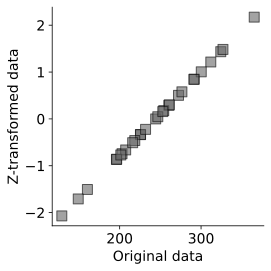

In [6]:
x = np.random.normal(250,58,size=28)
zx = (x-np.mean(x)) / np.std(x,ddof=1)


plt.figure(figsize=(4,4))
plt.plot(x,zx,'ks',markersize=10,markerfacecolor=(.4,.4,.4),alpha=.6)
plt.xlabel('Original data')
plt.ylabel('Z-transformed data')

plt.tight_layout()
plt.show()

### Fig 6.3: Z-scoring a non-normal distribution

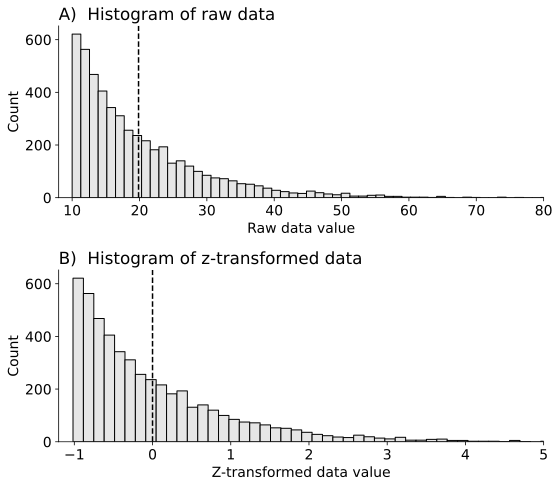

In [7]:
N = 5000
X = (1+np.random.exponential(size=N))*10
Xz = (X-np.mean(X)) / np.std(X,ddof=1)

_,axs = plt.subplots(2,1,figsize=(8,7))
axs[0].hist(X,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[0].axvline(np.mean(X),color='k',linestyle='--')
axs[0].set(xlabel='Raw data value',ylabel='Count',xlim=[8,80])
axs[0].set_title(r'A)  Histogram of raw data')

axs[1].hist(Xz,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1].axvline(np.mean(Xz),color='k',linestyle='--')
axs[1].set(xlabel='Z-transformed data value',ylabel='Count',xlim=[-1.2,5])
axs[1].set_title(r'B)  Histogram of z-transformed data')


plt.tight_layout()
plt.show()

### Fig 6.4: Modified-z

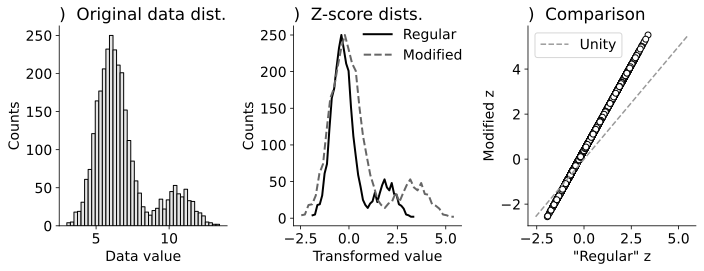

In [8]:
# Some non-normal data
x1 = np.random.randn(500) + 2.5
x2 = np.random.randn(2500) - 2
y  = np.concatenate((x1,x2))
y  = y - np.min(y)+3


# regular z-score
y_z = (y-np.mean(y)) / np.std(y,ddof=1)

# modified z
MAD = np.median( np.abs(y - np.median(y)) )
y_zm = stats.norm.ppf(3/4) * (y - np.median(y)) / MAD


# their histograms
yy_z,xx_z = np.histogram(y_z,bins='fd')
yy_zm,xx_zm = np.histogram(y_zm,bins='fd')



_,axs = plt.subplots(1,3,figsize=(10,4))

axs[0].hist(y,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[0].set(xlabel='Data value',ylabel='Counts',title=r')  Original data dist.')

axs[1].plot((xx_z[1:]+xx_z[:-1])/2,yy_z,linewidth=2,color='k',label='Regular')
axs[1].plot((xx_zm[1:]+xx_zm[:-1])/2,yy_zm,'--',linewidth=2,color=(.4,.4,.4),label='Modified')
axs[1].legend(loc='upper right',frameon=False,bbox_to_anchor=[1.08,1.05])
axs[1].set(xlabel='Transformed value',ylabel='Counts',title=r')  Z-score dists.')


axs[2].plot(y_z,y_zm,'ko',markerfacecolor='w')
xval = np.min( [np.min(y_z),np.min(y_zm)] )
yval = np.max( [np.max(y_z),np.max(y_zm)] )
axs[2].plot([xval,yval],[xval,yval],'--',color=(.6,.6,.6),label='Unity')
axs[2].set(xlabel='"Regular" z',ylabel='Modified z',title=r')  Comparison')
axs[2].legend()

plt.tight_layout()
plt.show()

### Fig 6.5: Min-Max scaling

In [9]:
def minmaxScaling(x):

  # compute the min-max values and transform 
  return (x - np.min(x)) / (np.max(x) - np.min(x))

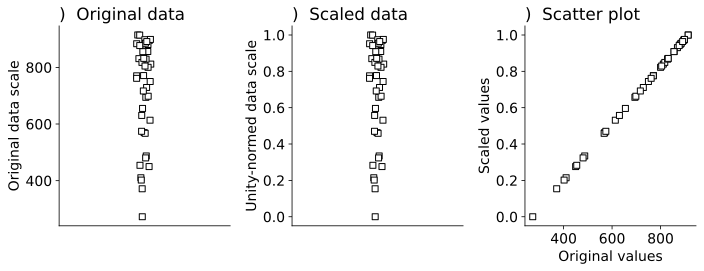

In [10]:
## create some data

N = 42
data = np.log(np.random.rand(N))*234 + 934

# now min-max scale
dataS = minmaxScaling(data)


# now plot
fig,ax = plt.subplots(1,3,figsize=(10,4))
randomXoffsets = 1+np.random.randn(N)/20
ax[0].plot(randomXoffsets,data,'ks',markerfacecolor='w')
ax[0].set(xlim=[0,2],xticks=[],ylabel='Original data scale')
ax[0].set_title(r')  Original data')

ax[1].plot(randomXoffsets,dataS,'ks',markerfacecolor='w')
ax[1].set(xlim=[0,2],xticks=[],ylabel='Unity-normed data scale')
ax[1].set_title(r')  Scaled data')

ax[2].plot(data,dataS,'ks',markerfacecolor='w')
ax[2].set(xlabel='Original values',ylabel='Scaled values')
ax[2].set_title(r')  Scatter plot')


plt.tight_layout()
plt.show()

### Fig 6.6: Another example of min-max scaling

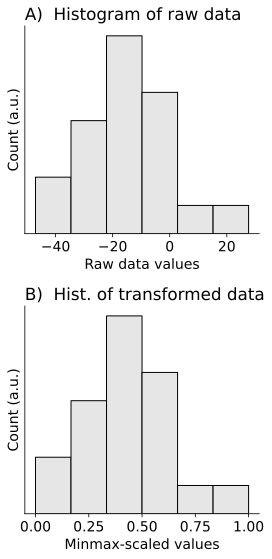

In [11]:
# generate a Laplace distribution
x1 = np.exp(-np.abs(3*np.random.randn(40)))
x2 = np.exp(-np.abs(3*np.random.randn(40)))
x = (x1-x2)*42 - 13


# minmax scale
xm = minmaxScaling(x)


_,axs = plt.subplots(2,1,figsize=(4,8))

axs[0].hist(x,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[0].set(yticks=[],ylabel='Count (a.u.)',xlabel='Raw data values')
axs[0].set_title(r'A)  Histogram of raw data')

axs[1].hist(xm,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1].set(yticks=[],ylabel='Count (a.u.)',xlabel='Minmax-scaled values')
axs[1].set_title(r'B)  Hist. of transformed data')


plt.tight_layout()
plt.show()

### Percent change

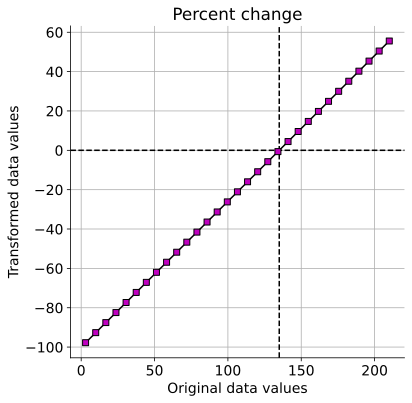

In [12]:
# a range of values for "new"
new = np.linspace(3,210,31)

# reference value
ref = 135

# compute percent change
pctchg = 100*(new-ref) / ref


# visualize the transformed data
plt.figure(figsize=(6,6))
plt.plot(new,pctchg,'ks-',markerfacecolor='m',zorder=30)
plt.axhline(0,color='k',linestyle='--')
plt.axvline(ref,color='k',linestyle='--')
plt.xlabel('Original data values')
plt.ylabel('Transformed data values')
plt.title('Percent change',loc='center')
plt.grid()
plt.show()

### Rank transform

In [13]:
x = [ 4,1,2,3,3 ]

stats.rankdata(x)
     

array([5. , 1. , 2. , 3.5, 3.5])

### Fig 6.7: Log transform

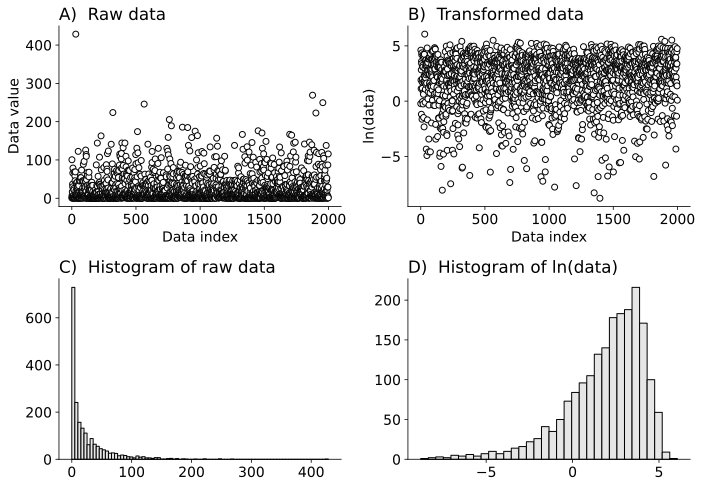

In [14]:
# generate data from power-law distribution
X = np.random.normal(0,5,size=2000)**2
Xlog = np.log(X)


_,axs = plt.subplots(2,2,figsize=(10,7))

# scatter plots
axs[0,0].plot(X,'ko',markerfacecolor='w')
axs[0,0].set(xlabel='Data index',ylabel='Data value')
axs[0,0].set_title(r'A)  Raw data')

axs[0,1].plot(Xlog,'ko',markerfacecolor='w')
axs[0,1].set(xlabel='Data index',ylabel='ln(data)')
axs[0,1].set_title(r'B)  Transformed data')


# histograms
axs[1,0].hist(X,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1,0].set_title(r'C)  Histogram of raw data')

axs[1,1].hist(Xlog,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1,1].set_title(r'D)  Histogram of ln(data)')


plt.tight_layout()
plt.show()

### Fig 6.8: Logarithm vs square root

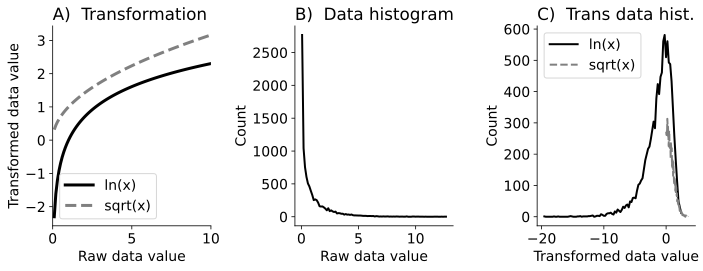

In [15]:
# some right-tailed non-normally distributed data
X = np.random.randn(10000)**2

y_r,x_r = np.histogram(X,bins=100) # r = raw
y_l,x_l = np.histogram(np.log(X),bins=100) # l = log
y_s,x_s = np.histogram(np.sqrt(X),bins=100) # s = sqrt



_,axs = plt.subplots(1,3,figsize=(10,4))

# theory
q = np.linspace(.1,10,100)
axs[0].plot(q,np.log(q),'k',linewidth=3,label='ln(x)')
axs[0].plot(q,np.sqrt(q),'--',color='gray',linewidth=3,label='sqrt(x)')
axs[0].set(xlim=[0,10],xlabel='Raw data value',ylabel='Transformed data value')
axs[0].set_title(r'A)  Transformation')
axs[0].legend()

# untransformed data
axs[1].plot((x_r[1:]+x_r[:-1])/2,y_r,'k',linewidth=2)
axs[1].set(xlabel='Raw data value',ylabel='Count')
axs[1].set_title(r'B)  Data histogram')

axs[2].plot((x_l[1:]+x_l[:-1])/2,y_l,'k',linewidth=2,label='ln(x)')
axs[2].plot((x_s[1:]+x_s[:-1])/2,y_s,'--',color='gray',linewidth=2,label='sqrt(x)')
axs[2].set(xlabel='Transformed data value',ylabel='Count')
axs[2].set_title(r'C)  Trans data hist.')
axs[2].legend()


plt.tight_layout()
plt.show()

### Fig 6.9: Fisher-z transform

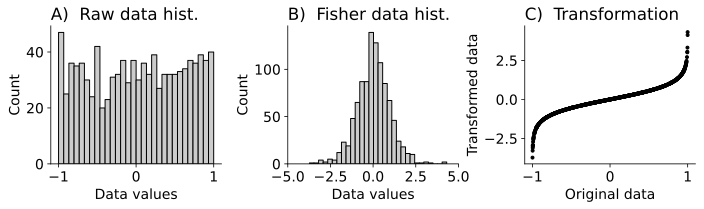

In [16]:
N = 1000

# uniform data in range [-1,1]
Y = np.random.uniform(-1,1,size=N)
# Note: Fisher-z is undefined for Y==|1|, but the probability of that happening in
#       random uniform data is so vanishingly small that coding an exception is unnecessary.

# transform
fY = np.arctanh(Y)

_,axs = plt.subplots(1,3,figsize=(10,np.pi))

axs[0].hist(Y,30,color=(.8,.8,.8),edgecolor='k')
axs[0].set(xlabel='Data values', ylabel='Count')
axs[0].set_title(r'A)  Raw data hist.')

axs[1].hist(fY,30,color=(.8,.8,.8),edgecolor='k')
axs[1].set(xlim=[-5,5],xlabel='Data values', ylabel='Count')
axs[1].set_title(r'B)  Fisher data hist.')

axs[2].plot(Y,fY,'k.')
axs[2].set_title(r'C)  Transformation')
axs[2].set(xlabel='Original data',ylabel='Transformed data')

plt.tight_layout()
plt.show()

### Fig 6.10: Transform any distribution to Gaussian

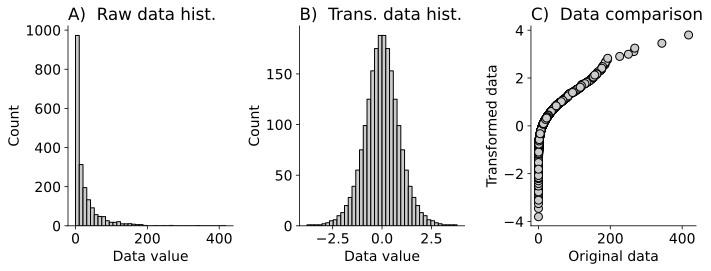

In [17]:
X = np.random.normal(0,5,size=2000)**2

X_r = stats.rankdata( X )
a,b = -.999,.999
X_r2 = (X_r-np.min(X_r)) / (np.max(X_r)-np.min(X_r)) * (b-a) + a
X_t = np.arctanh( X_r2 )

_,axs = plt.subplots(1,3,figsize=(10,4))
axs[0].hist(X,40,color=(.8,.8,.8),edgecolor='k')
axs[0].set(xlabel='Data value',ylabel='Count')
axs[0].set_title(r'A)  Raw data hist.')

axs[1].hist(X_t,40,color=(.8,.8,.8),edgecolor='k')
axs[1].set(xlabel='Data value',ylabel='Count')
axs[1].set_title(r'B)  Trans. data hist.')

axs[2].plot(X,X_t,'ko',markersize=8,markerfacecolor=(.8,.8,.8))
axs[2].set(xlabel='Original data',ylabel='Transformed data')
axs[2].set_title(r'C)  Data comparison')

plt.tight_layout()
plt.show()

### Fig 6.11: Linearization of nonlinear relationship

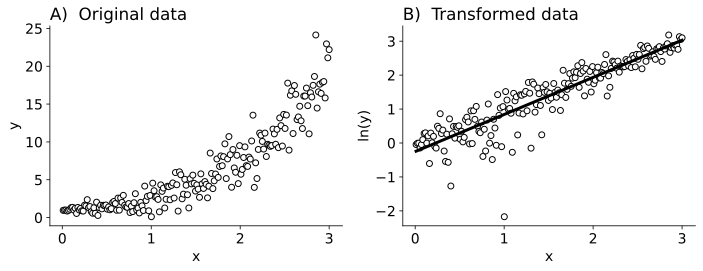

In [18]:
# sample size
N = 200

# the data (note how the nonlinearity is implemented)
x = np.linspace(.01,3,N)
y = np.exp(x) + np.random.randn(N)*np.linspace(.1,1,N)*3
y = np.abs(y)

_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(x,y,'ko',markerfacecolor='w')
axs[0].set(xlabel='x',ylabel='y')
axs[0].set_title(r'A)  Original data')

axs[1].plot(x,np.log(y),'ko',markerfacecolor='w')
axs[1].set(xlabel='x',ylabel='ln(y)')
axs[1].set_title(r'B)  Transformed data')

a,b = np.polyfit(x,np.log(y),1)
axs[1].plot(x,a*x+b,'k',linewidth=3)

plt.tight_layout()
plt.show()